In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
from ast import literal_eval
data=pd.read_csv(r'C:\Users\user\OneDrive - 서울과학기술대학교\바탕 화면\repo\new_year_speech\preprocessing.csv', converters={'전문2': literal_eval})

In [10]:
import warnings

warnings.filterwarnings(action='ignore') 


In [20]:
shopping_list = list(data['전문2'][(data['산업군']=='전자') & (data['연도']==2021)])

In [17]:
data.dtypes

산업군    object
기업명    object
연도      int64
발표자    object
전문     object
출처     object
전문1    object
전문2    object
dtype: object

0     [변화, 물결, 단계, 도약, 변화, 대응, 미래, 준비, 원년, 코로나, 인해, ...
5     [최고, 품질, 확보, 안전, 문제, 제로, 달성, 시장, 기회, 기회, 추진, 사...
10    [고객, 가치, 기반, 성장, 변화, 변화, 성장, 노력, 계속, 성과, 일회, 본...
15    [OLED, 최고, 안정, 성장, 이익, 창출, 핵심, 사업, OLED, 패널, 미...
20    [기존, 파트너, 협력, 관계, 수준, 경쟁자, 혁신, 협업, 모색, 외부, 자원,...
Name: 전문2, dtype: object

-  betweenness centrality가 가장 높은 제품 ?
- closeness centrality가 가장 높은 제품 ?
-  degree centrality가 가장 높은 제품 ?

In [ ]:
# shopping_list에 ' soda'로 되어있는 게 있어, 공백 제거함

In [12]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)


In [ ]:
from apyori import apriori

result = (list(apriori(shopping_list, min_support = 0.01)))
df = pd.DataFrame(result)
df


In [ ]:
df['length'] = df['items'].apply(lambda x : len(x))
df = df[(df['length'] == 2) & (df['support'] > = 0.01)].sort_values(by='support', ascending = False)

In [ ]:
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

In [ ]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize-min(nsize)) / (max(nsize) - min(nsize))



In [ ]:
pos = nx.planar_layout(G)

In [ ]:
plt.figure()
plt.axis('off')

nx.draw_networkx(G,  font_family=font_name, font_size=16,
                 pos=pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap=plt.cm.YIGn)



In [21]:
G = nx.Graph()
for one in shopping_list:
    G.add_nodes_from(one)
    for j in range(1,len(one)-1):
        for i in range(len(one)-j):
            G.add_edge(one[i], one[i+j])

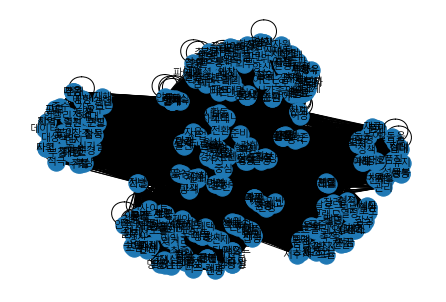

In [22]:
nx.draw(G, with_labels=True, font_family=font_name,font_size=10)

In [ ]:
import operator

In [ ]:
between = nx.betweenness_centrality(G)
# centrality 내림차순 정렬
print(sorted(between.items(), key=operator.itemgetter(1), reverse=True))
print('-'*50)
print('★ betweenness centrality가 가장 높은 제품 :' + sorted(between.items(), key=operator.itemgetter(1), reverse=True)[0][0])

In [ ]:
closeness = nx.closeness_centrality(G)
# centrality 내림차순 정렬
print(sorted(closeness.items(), key=operator.itemgetter(1), reverse=True))
print('-'*50)
print('★ closeness centrality가 가장 높은 제품 :' + sorted(closeness.items(), key=operator.itemgetter(1), reverse=True)[0][0])

In [ ]:
degree = nx.degree_centrality(G)
# centrality 내림차순 정렬
print(sorted(degree.items(), key=operator.itemgetter(1), reverse=True))
print('-'*50)
print('★ degree centrality가 가장 높은 제품 :' + sorted(degree.items(), key=operator.itemgetter(1), reverse=True)[0][0])